In [34]:
import pandas as pd


ny_city_file_path = "../new-york-city-airbnb-open-data.csv"


def read_csv_file(file_path, num_row=10) -> pd.DataFrame | None:
    try:
        df = pd.read_csv(file_path, index_col=None, na_values=["NA"])
        return df.head(num_row)
    except FileNotFoundError:
        print("Error: File not found.")
        return None


def process_data(df):
    print("\nProcessing NY data...")
    print("\nNumber of rows:", len(df))


def remove_nan_values(df):
    return df.dropna()


global ny_city_df
ny_city_df = None


def save_to_csv_file(df, file_path) -> pd.DataFrame | None:
    try:
        df = df.to_csv(file_path, index=False)
        print("Data saved successfully.")
        return df
    except Exception as e:
        print("Error: Failed to save data.", e)


if __name__ == "__main__":
    try:
        print("Starting data processing...")
        df = read_csv_file(file_path=ny_city_file_path, num_row=400)
        if df is None:
            raise Exception("Data processing aborted.")
        df = remove_nan_values(df)
        print("\n NY data after removing NaN values:\n",
              df["minimum_nights"].describe())
        process_ny_data_file_path = ny_city_file_path.replace(
            "/", ".").split(".")[-2]+"_processed.csv"
        print("\nData saved to:", process_ny_data_file_path)
        ny_city_df = save_to_csv_file(df, file_path=process_ny_data_file_path)
    except Exception as e:
        print("An error occurred:", e)


Starting data processing...

 NY data after removing NaN values:
 count    385.000000
mean       7.974026
std       17.003962
min        1.000000
25%        2.000000
50%        3.000000
75%        6.000000
max      200.000000
Name: minimum_nights, dtype: float64

Data saved to: new-york-city-airbnb-open-data_processed.csv
Data saved successfully.


/var/folders/bh/4rclxbnx2016p9vvx1sx17th0000gn/T/ipykernel_10399/1176087162.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['room_type']).plot.bar()


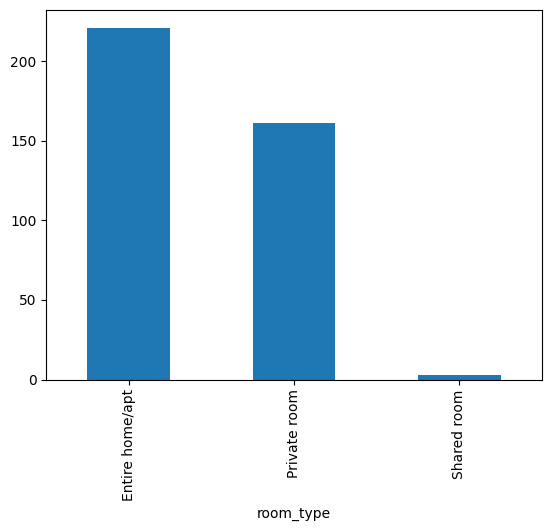

In [35]:
if df is not None:
    pd.value_counts(df['room_type']).plot.bar()


In [36]:
ny_city_df = df
print(ny_city_df.head(5))


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
5        Chris           Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [37]:
if ny_city_df is not None:
    print("ny_city_df shape", ny_city_df.shape)
    print("ny_city_df columns", ny_city_df.columns)
    print(ny_city_df.groupby(['price']).count())


ny_city_df shape (385, 16)
ny_city_df columns Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
       id  name  host_id  host_name  neighbourhood_group  neighbourhood  \
price                                                                     
36      2     2        2          2                    2              2   
37      2     2        2          2                    2              2   
39      2     2        2          2                    2              2   
40      2     2        2          2                    2              2   
44      2     2        2          2                    2              2   
45      1     1        1          1                    1              1   
49      2     2        2          2       

In [38]:

a = [1, 7, 2]

myvar = pd.Series(a)
myvar_index = pd.Series(a, index=['x', 'y', 'z'])

print(myvar_index)
print("Accesing the item by index", myvar_index["y"])

print(myvar)
# when we have dict
mydict = {"a": 1, "b": 2, "c": 3}
myseries = pd.Series(mydict)
print(myseries)


x    1
y    7
z    2
dtype: int64
Accesing the item by index 7
0    1
1    7
2    2
dtype: int64
a    1
b    2
c    3
dtype: int64


In [39]:
# Dataframe is multi-dimesional table or whole table
# while Series is one dimensional array or one column in the table
df = pd.DataFrame({
    "Name": ["John", "Anna", "Peter", "Linda"],
    "Age": [24, 28, 32, 36],
    "City": ["New York", "Paris", "London", "Tokyo"]
})
print(df)

# Accessing the item by index
print("---- Accessing the item by index ----")
print(df.loc[0])
print(df.loc[2])


    Name  Age      City
0   John   24  New York
1   Anna   28     Paris
2  Peter   32    London
3  Linda   36     Tokyo
---- Accessing the item by index ----
Name        John
Age           24
City    New York
Name: 0, dtype: object
Name     Peter
Age         32
City    London
Name: 2, dtype: object


In [40]:
data = {
    "Name": ["John", "Anna", "Peter", "Linda"],
    "Age": [24, 28, 32, 36],
    "City": ["New York", "Paris", "London", "Tokyo"]
}
# load data into DataFrame
df = pd.DataFrame(data)
print(df)
# adding a new column
df["Country"] = ["USA", "France", "England", "Japan"]
print("after addigng Coutry\n", df)
# deleting a column
del df["Country"]
print("after deleting Coutry\n", df)


    Name  Age      City
0   John   24  New York
1   Anna   28     Paris
2  Peter   32    London
3  Linda   36     Tokyo
after addigng Coutry
     Name  Age      City  Country
0   John   24  New York      USA
1   Anna   28     Paris   France
2  Peter   32    London  England
3  Linda   36     Tokyo    Japan
after deleting Coutry
     Name  Age      City
0   John   24  New York
1   Anna   28     Paris
2  Peter   32    London
3  Linda   36     Tokyo


In [41]:
# accessing a particular row
print("---- Accessing the item by index ----")
print(df.loc[0])
print(df.loc[2])
print("---- printing entire data frame ----")
print(df.to_string())


---- Accessing the item by index ----
Name        John
Age           24
City    New York
Name: 0, dtype: object
Name     Peter
Age         32
City    London
Name: 2, dtype: object
---- printing entire data frame ----
    Name  Age      City
0   John   24  New York
1   Anna   28     Paris
2  Peter   32    London
3  Linda   36     Tokyo


In [42]:
print("pandas version:", pd.__version__)
pd.options.display.max_rows = 9999
print(ny_city_df.to_json(index=False))
print("current max row configuration:", pd.options.display.max_rows)


pandas version: 2.2.3
{"id":{"0":2539,"1":2595,"3":3831,"4":5022,"5":5099,"6":5121,"7":5178,"8":5203,"9":5238,"10":5295,"11":5441,"12":5803,"13":6021,"14":6090,"15":6848,"16":7097,"17":7322,"18":7726,"20":7801,"21":8024,"22":8025,"23":8110,"24":8490,"25":8505,"27":9357,"28":9518,"29":9657,"30":9668,"31":9704,"32":9782,"33":9783,"34":10452,"35":10962,"37":11708,"39":12048,"40":12192,"41":12299,"42":12303,"43":12318,"44":12343,"45":12627,"46":12937,"47":12940,"48":13050,"49":13394,"50":13808,"51":14287,"52":14290,"53":14314,"54":14322,"55":14377,"56":14991,"57":15220,"58":15338,"59":15341,"60":15385,"61":15396,"62":15711,"63":16326,"64":16338,"65":16421,"66":16458,"67":16580,"68":16595,"69":16821,"70":16974,"71":17037,"72":17092,"73":17693,"74":17747,"75":18127,"76":18152,"77":18198,"78":18590,"79":18728,"80":18764,"81":19159,"82":19169,"83":19282,"84":19319,"85":19601,"86":19812,"87":20299,"88":20300,"89":20611,"90":20724,"91":20734,"92":20755,"93":20853,"94":20913,"95":21293,"96":21456

In [43]:
data = {
    "Duration": {
        "0": 60,
        "1": 60,
        "2": 60,
        "3": 45,
        "4": 45,
        "5": 60
    },
    "Pulse": {
        "0": 110,
        "1": 117,
        "2": 103,
        "3": 109,
        "4": 117,
        "5": 102
    },
    "Maxpulse": {
        "0": 130,
        "1": 145,
        "2": 135,
        "3": 175,
        "4": 148,
        "5": 127
    },
    "Calories": {
        "0": 409,
        "1": 479,
        "2": 340,
        "3": 282,
        "4": 406,
        "5": 300
    }
}


df.to_excel("output.xlsx", index=True)
print("DataFrame has been written to 'output.xlsx'")

print("Markdown format", df.to_markdown())


DataFrame has been written to 'output.xlsx'
Markdown format |    | Name   |   Age | City     |
|---:|:-------|------:|:---------|
|  0 | John   |    24 | New York |
|  1 | Anna   |    28 | Paris    |
|  2 | Peter  |    32 | London   |
|  3 | Linda  |    36 | Tokyo    |


In [44]:
# return last 5 rows
print("last 5 rows", df.tail(5))
# we can the dataframe info
print("dataframe info", df.info())

# we can sort the dataframe by a column
print("sorted by duration", df.sort_values(by='Duration', ascending=True))


print(df.head(1000))


last 5 rows     Name  Age      City
0   John   24  New York
1   Anna   28     Paris
2  Peter   32    London
3  Linda   36     Tokyo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
 2   City    4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes
dataframe info None


KeyError: 'Duration'

In [ ]:
print(df.head(20))
df["Duration"][3] = None

# calculate the MODE()  - most frequent value
print("\nMode function on Duration column\n")
duration_mode = df["Duration"].mode()


print("Mode", duration_mode[0])
df["Duration"].fillna(value=duration_mode, inplace=True)
print("\n\n")
print("after changing value at index 3", df)
# lets fill the Missing values
# below code will fill all nan values with 0
# print("filled data", df.fillna(value=0))
# based on column mean
duration_mean = df["Duration"].mean()
print("duration mean", duration_mean)
df["Duration"].fillna(value=duration_mean, inplace=True)
print("after filling missing values with mean", df)


In [ ]:
clean_data = df.dropna()
print("clean data", clean_data)
# both are different, clean_data has been created from df
print(id(df) == id(clean_data))
# when we use inplace=True, the original dataframe will be modified and it will not return a new dataframe
# df.dropna(inplace=True)
print("after inplace=True", df)

df["Duration"].fillna(value=0, inplace=True)


In [ ]:
# lets load the ny_city_df from file
if ny_city_df is not None:
    print(ny_city_df["last_review"].head(44445))
    # let the convert the last_review to datetime or diff format
    ny_city_df["last_review"] = pd.to_datetime(ny_city_df["last_review"])
    ny_city_df.dropna(subset=["last_review"], inplace=True)
    print(ny_city_df["last_review"].head(5))


if df is not None:
    print(df["Age"].mean())
    for x in df.index:
        if df.loc[x, "Age"] > 33:  # type: ignore
            df.drop(x, inplace=True)
print(df)


In [ ]:
if df is not None:
    print(df["Age"].mean())
    for x in df.index:
        if df.loc[x, "Age"] > 10:  # type: ignore
            df.loc[x, "Duration"] = 120


if ny_city_df is not None:
    ny_city_df1 = ny_city_df.head(40)
    print(ny_city_df1["last_review"].dt.day.head(5))
    print("column names", ny_city_df1.columns)
    for idx in ny_city_df1.index:
        if ny_city_df1.loc[idx, "price"] > 10:  # type: ignore
            ny_city_df1.loc[idx, "price"] = 101
    print("price > 100", ny_city_df1[ny_city_df1["price"] > 100])


In [ ]:
# remove the duplicates rows
if ny_city_df is not None:
    print("shape before removing duplicates", ny_city_df.shape)
    ny_city_df.drop_duplicates(inplace=True)
    print("shape after removing duplicates", ny_city_df.shape)

# apply a function to a column


In [ ]:
if ny_city_df is not None:
    print("ny city data has duplicates",  ny_city_df.duplicated().sum())
    ny_city_df["price"] = ny_city_df["price"].apply(lambda x: x*2)
    print("price after doubling", ny_city_df["price"].head(5))


In [ ]:
import matplotlib.pyplot as plt

if ny_city_df is not None:
    plt.bar(ny_city_df["price"].head(20),
            ny_city_df["calculated_host_listings_count"].head(20))
    plt.show()

# creating histograms
if ny_city_df is not None:
    ny_city_df["availability_365"].hist(bins=50)
    plt.show()


In [ ]:
import json

if ny_city_df is not None:
    ny_city_df.drop(
        columns=["price", "calculated_host_listings_count"], inplace=True)
    ny_json = ny_city_df.to_json(orient='records')
    print(ny_json)

    with open('ny_city_data.json', 'w') as f:
        json.dump(json.loads(ny_json), f)


In [85]:
if ny_city_df is not None:
    try:
        # Ensure 'last_review' is in datetime format
        ny_city_df["last_review"] = pd.to_datetime(ny_city_df["last_review"], errors='coerce')
        ny_city_df["review_month"]=ny_city_df["last_review"].dt.month
        ny_city_df["review_year"] = ny_city_df["last_review"].dt.year
        print(ny_city_df["review_year"].head(5))
    except Exception as e:
        print("An error occurred while processing 'last_review':", e)


0    2018
1    2019
3    2019
4    2018
5    2019
Name: review_year, dtype: int32


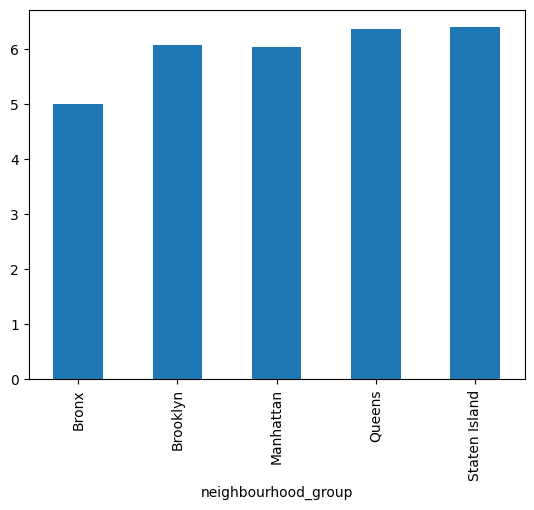

In [115]:
if ny_city_df is not None:  
    # print("average price per month", ny_city_df.head(5))
    ny_city_df.groupby("neighbourhood_group")["review_month"].mean().plot(kind="bar")

